In [43]:
# import packages
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [44]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

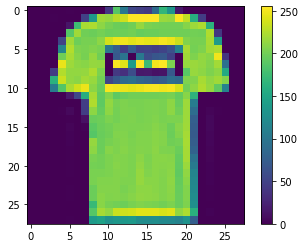

In [45]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [46]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [47]:
def train_mnist():

    class CustomCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            keys = list(logs.keys())
            if logs.get(keys[1]) > 0.999:
                print("End epoch {} of training; got log keys: {}".format(epoch, keys))

        def on_train_end(self, logs=None):
            print("Reached trainig end returning model ")
 
    # creat the model 
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128 , activation = tf.nn.relu ),
        tf.keras.layers.Dense(10,  activation = tf.nn.softmax)
    ])

    # add the loss function and the optimizer for gradient descent 
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(
        x_train,
        y_train,
        epochs=100,
        callbacks=[CustomCallback()],
    )

    # model fitting
    return  model

In [48]:
model = train_mnist()

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6316 - accuracy: 0.7776
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8647
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.8755
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3103 - accuracy: 0.8859
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2903 - accuracy: 0.8926
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2765 - accuracy: 0.8981
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2672 - accuracy: 0.9010
Epoch 8/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2578 - accuracy: 0.9037
Epoch 9/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2442 - accuracy: 0.9087
Epoch 10/100
1875/1875 [==============================] - 2s 1ms/step - l

In [49]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.7468 - accuracy: 0.8898

Test accuracy: 0.8898000121116638


In [50]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [51]:
predictions = model.predict(x_test)
label = np.argmax(predictions[1])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names[label])

Pullover
